<a href="https://colab.research.google.com/github/mawga2/personal/blob/main/Sentiment_analysis_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Initialization**

In [ ]:
#Installation
!pip install transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 29.7 MB/s eta 0:00:00


In [ ]:
#Import
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from tqdm import tqdm

Mounted at /content/drive


#**NLP-Town/bert-base-multilingual-uncased-sentiment**

In [ ]:
#Initialization
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

def analyze_sentiment(df, column_name):
  #Check existence of column_name
  if column_name not in df.columns:
    raise ValueError(f"'{column_name}' does not exist in the dataframe")

  #Array
  sentences = df[column_name].tolist()

  #Case checking
  if not isinstance(sentences, list):
    raise ValueError("Input must be a list of strings.")

  #Sentiment rating and probabilities
  ratings_probs = []
  average_ratings = []

  for sentence in sentences:
    #Tokenization
    inputs = tokenizer.encode_plus(sentence, return_tensors='pt')

    #Model output
    outputs = model(**inputs)

    #Convert logits to probabilities
    probs = F.softmax(outputs.logits, dim=1)

    #Predicted class index and probability
    predicted_class_idx = torch.argmax(probs, dim=1).item()
    predicted_class_prob = probs[0, predicted_class_idx].item()

    #Convert to sentiment rating (1 to 5)
    sentiment_rating = predicted_class_idx + 1

    #Expected rating
    average_rating = sum((i+1) * prob.item() for i, prob in enumerate(probs[0])) / 5
    average_ratings.append(average_rating)

  #Create new dataframe
  result_df = pd.DataFrame({
      'title': sentences,
      'Average rating': average_ratings
    })

  return result_df

## **Testing code**


In [ ]:
file = '/content/drive/MyDrive/COVID-19_tweets 2.csv'
df1 = pd.read_csv(file, encoding='unicode_escape')
df1 = df1[['text']]
df1.dropna(inplace=True)
df1.head()

In [ ]:
print(df1.shape)

In [ ]:
test_df = analyze_sentiment(df1, 'text')

## **Implementation**

In [ ]:
file = '/content/drive/MyDrive/tweets.csv'
df2 = pd.read_csv(file)
df2 = df2[['created_at', 'tweet', 'sentiment', 'language']]
en_df2 = df2.loc[df2['language'] == 'en']
en_df2 = en_df2.reset_index(drop=True)
en_df2

,created_at,tweet,sentiment,language
0,2021-04-27 23:16:27 UTC,German Army working around the clock to help I...,NEGATIVE,en
1,2021-04-27 22:04:08 UTC,"TBC, this is an old report. The point is that ...",NEGATIVE,en
2,2021-04-27 22:01:22 UTC,"""Most government-linked disinformation efforts...",NEGATIVE,en
3,2021-04-27 21:56:38 UTC,The news out of #India is devastating. #CovidI...,NEGATIVE,en
4,2021-04-27 21:46:00 UTC,Second COVID wave has hampered India's economi...,NEGATIVE,en
...,...,...,...,...
5820,2020-03-06 17:13:33 UTC,"#COVID OR no Covid, India is not China or USA....",NEGATIVE,en
5821,2020-03-04 05:36:35 UTC,Watch #CoronaVirusUpdate from Gandhi Hospital ...,NEGATIVE,en
5822,2020-03-03 11:14:53 UTC,#CoronavirusUpdate || A 15 member team from #T...,POSITIVE,en
5823,2020-03-02 12:39:20 UTC,Ye gads ... Now NDTV’s @harsha_ndtv reports a...,NEGATIVE,en


In [ ]:
en_df2 = en_df2.drop(columns=['language'])
en_df2

,created_at,tweet,sentiment
0,2021-04-27 23:16:27 UTC,German Army working around the clock to help I...,NEGATIVE
1,2021-04-27 22:04:08 UTC,"TBC, this is an old report. The point is that ...",NEGATIVE
2,2021-04-27 22:01:22 UTC,"""Most government-linked disinformation efforts...",NEGATIVE
3,2021-04-27 21:56:38 UTC,The news out of #India is devastating. #CovidI...,NEGATIVE
4,2021-04-27 21:46:00 UTC,Second COVID wave has hampered India's economi...,NEGATIVE
...,...,...,...
5820,2020-03-06 17:13:33 UTC,"#COVID OR no Covid, India is not China or USA....",NEGATIVE
5821,2020-03-04 05:36:35 UTC,Watch #CoronaVirusUpdate from Gandhi Hospital ...,NEGATIVE
5822,2020-03-03 11:14:53 UTC,#CoronavirusUpdate || A 15 member team from #T...,POSITIVE
5823,2020-03-02 12:39:20 UTC,Ye gads ... Now NDTV’s @harsha_ndtv reports a...,NEGATIVE


In [ ]:
title_df = en_df2[['tweet']]
title_df

,tweet
0,German Army working around the clock to help I...
1,"TBC, this is an old report. The point is that ..."
2,"""Most government-linked disinformation efforts..."
3,The news out of #India is devastating. #CovidI...
4,Second COVID wave has hampered India's economi...
...,...
5820,"#COVID OR no Covid, India is not China or USA...."
5821,Watch #CoronaVirusUpdate from Gandhi Hospital ...
5822,#CoronavirusUpdate || A 15 member team from #T...
5823,Ye gads ... Now NDTV’s @harsha_ndtv reports a...


In [ ]:
date_df = en_df2[['created_at']]
date_df

,created_at
0,2021-04-27 23:16:27 UTC
1,2021-04-27 22:04:08 UTC
2,2021-04-27 22:01:22 UTC
3,2021-04-27 21:56:38 UTC
4,2021-04-27 21:46:00 UTC
...,...
5820,2020-03-06 17:13:33 UTC
5821,2020-03-04 05:36:35 UTC
5822,2020-03-03 11:14:53 UTC
5823,2020-03-02 12:39:20 UTC


In [ ]:
location_df = en_df2[['sentiment']]
location_df

,sentiment
0,NEGATIVE
1,NEGATIVE
2,NEGATIVE
3,NEGATIVE
4,NEGATIVE
...,...
5820,NEGATIVE
5821,NEGATIVE
5822,POSITIVE
5823,NEGATIVE


In [ ]:
nlpt_result_df = analyze_sentiment(title_df, 'tweet')

In [ ]:
nlpt_result_df

,title,Average rating
0,German Army working around the clock to help I...,0.584871
1,"TBC, this is an old report. The point is that ...",0.403306
2,"""Most government-linked disinformation efforts...",0.393347
3,The news out of #India is devastating. #CovidI...,0.327343
4,Second COVID wave has hampered India's economi...,0.390797
...,...,...
5820,"#COVID OR no Covid, India is not China or USA....",0.368819
5821,Watch #CoronaVirusUpdate from Gandhi Hospital ...,0.443000
5822,#CoronavirusUpdate || A 15 member team from #T...,0.563771
5823,Ye gads ... Now NDTV’s @harsha_ndtv reports a...,0.387005


In [ ]:
nlpt_combined_df = pd.concat([nlpt_result_df, date_df, location_df], axis=1)
nlpt_combined_df

,title,Average rating,created_at,sentiment
0,German Army working around the clock to help I...,0.584871,2021-04-27 23:16:27 UTC,NEGATIVE
1,"TBC, this is an old report. The point is that ...",0.403306,2021-04-27 22:04:08 UTC,NEGATIVE
2,"""Most government-linked disinformation efforts...",0.393347,2021-04-27 22:01:22 UTC,NEGATIVE
3,The news out of #India is devastating. #CovidI...,0.327343,2021-04-27 21:56:38 UTC,NEGATIVE
4,Second COVID wave has hampered India's economi...,0.390797,2021-04-27 21:46:00 UTC,NEGATIVE
...,...,...,...,...
5820,"#COVID OR no Covid, India is not China or USA....",0.368819,2020-03-06 17:13:33 UTC,NEGATIVE
5821,Watch #CoronaVirusUpdate from Gandhi Hospital ...,0.443000,2020-03-04 05:36:35 UTC,NEGATIVE
5822,#CoronavirusUpdate || A 15 member team from #T...,0.563771,2020-03-03 11:14:53 UTC,POSITIVE
5823,Ye gads ... Now NDTV’s @harsha_ndtv reports a...,0.387005,2020-03-02 12:39:20 UTC,NEGATIVE


In [ ]:
nlpt_combined_df.to_csv('sentiment_analysis.csv', index=False)

# **DistilBERT-base-uncased-emotion**

In [ ]:
#Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('bhadresh-savani/distilbert-base-uncased-emotion')
model = AutoModelForSequenceClassification.from_pretrained('bhadresh-savani/distilbert-base-uncased-emotion')

#Pipeline for text classification
classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)

## **Testing**

In [ ]:
#Single sentence sentiment analysis
def classify_sentiment(text):
  if text.strip() == '':
    return 'Error: Empty input text'
  try:
    result = classifier(text, top_k=None)
    for item in result:
      print(f"Sentiment: {item['label']}; Probability: {item['score']}")
    return
  except Exception as e:
    return f'Error: {str(e)}'

In [ ]:
text = 'I am feeling happy today!'
print(classify_sentiment(text))

Sentiment: joy; Probability: 0.9990315437316895
Sentiment: love; Probability: 0.0003031042288057506
Sentiment: sadness; Probability: 0.00022583623649552464
Sentiment: surprise; Probability: 0.0001858934701886028
Sentiment: fear; Probability: 0.00013267924077808857
Sentiment: anger; Probability: 0.00012103276094421744
None


## **Implementation**

In [ ]:
def classify_sentiment(df, column_name):
  try:
    # Check existence of column_name
    if column_name not in df.columns:
      return 'Error: Column not found'

    # Initialize a new DataFrame to store the results
    result_df = pd.DataFrame(columns=['title', 'joy', 'love', 'sadness', 'surprise', 'fear', 'anger'])

    # Process each text entry
    for text in df[column_name]:
      if text.strip() == '':
        print('Error: Empty input text')
        continue

      # Initialize a dictionary to store the results for this text entry
      result_dict = {'title': text, 'joy': 0, 'love': 0, 'sadness': 0, 'surprise': 0, 'fear': 0, 'anger': 0}

      classification = classifier(text, top_k=None)
      for item in classification:
        # Update the result dictionary with the sentiment scores
        if item['label'] in result_dict:
          result_dict[item['label']] = item['score']

      # Append the result dictionary to the result DataFrame
      result_df = result_df.append(result_dict, ignore_index=True)

    return result_df
  except Exception as e:
    return f'Error: {str(e)}'

In [ ]:
distilbert_result_df = classify_sentiment(title_df, 'tweet')

Streaming output truncated to the last 5000 lines.
<ipython-input-16-5221a33e11f2>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(result_dict, ignore_index=True)
<ipython-input-16-5221a33e11f2>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(result_dict, ignore_index=True)
<ipython-input-16-5221a33e11f2>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(result_dict, ignore_index=True)
<ipython-input-16-5221a33e11f2>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(result_dict, ignore_index=True)
<ipython-input-16-522

In [ ]:
distilbert_result_df

,title,joy,love,sadness,surprise,fear,anger
0,German Army working around the clock to help I...,0.286461,0.003935,0.017398,0.003067,0.364157,0.324982
1,"TBC, this is an old report. The point is that ...",0.004798,0.001087,0.003226,0.000799,0.119858,0.870232
2,"""Most government-linked disinformation efforts...",0.569488,0.004628,0.029289,0.003666,0.081134,0.311795
3,The news out of #India is devastating. #CovidI...,0.001318,0.000431,0.997084,0.000127,0.000299,0.000741
4,Second COVID wave has hampered India's economi...,0.009378,0.001548,0.685198,0.001387,0.083149,0.219340
...,...,...,...,...,...,...,...
5820,"#COVID OR no Covid, India is not China or USA....",0.299912,0.005154,0.188610,0.005715,0.158333,0.342277
5821,Watch #CoronaVirusUpdate from Gandhi Hospital ...,0.040440,0.002685,0.039322,0.002545,0.883447,0.031562
5822,#CoronavirusUpdate || A 15 member team from #T...,0.464834,0.006583,0.210445,0.004030,0.156166,0.157942
5823,Ye gads ... Now NDTV’s @harsha_ndtv reports a...,0.010525,0.001208,0.006380,0.002486,0.972662,0.006739


In [ ]:
distilbert_combined_df = pd.concat([distilbert_result_df, date_df, location_df], axis=1)
distilbert_combined_df

,title,joy,love,sadness,surprise,fear,anger,created_at,sentiment
0,German Army working around the clock to help I...,0.286461,0.003935,0.017398,0.003067,0.364157,0.324982,2021-04-27 23:16:27 UTC,NEGATIVE
1,"TBC, this is an old report. The point is that ...",0.004798,0.001087,0.003226,0.000799,0.119858,0.870232,2021-04-27 22:04:08 UTC,NEGATIVE
2,"""Most government-linked disinformation efforts...",0.569488,0.004628,0.029289,0.003666,0.081134,0.311795,2021-04-27 22:01:22 UTC,NEGATIVE
3,The news out of #India is devastating. #CovidI...,0.001318,0.000431,0.997084,0.000127,0.000299,0.000741,2021-04-27 21:56:38 UTC,NEGATIVE
4,Second COVID wave has hampered India's economi...,0.009378,0.001548,0.685198,0.001387,0.083149,0.219340,2021-04-27 21:46:00 UTC,NEGATIVE
...,...,...,...,...,...,...,...,...,...
5820,"#COVID OR no Covid, India is not China or USA....",0.299912,0.005154,0.188610,0.005715,0.158333,0.342277,2020-03-06 17:13:33 UTC,NEGATIVE
5821,Watch #CoronaVirusUpdate from Gandhi Hospital ...,0.040440,0.002685,0.039322,0.002545,0.883447,0.031562,2020-03-04 05:36:35 UTC,NEGATIVE
5822,#CoronavirusUpdate || A 15 member team from #T...,0.464834,0.006583,0.210445,0.004030,0.156166,0.157942,2020-03-03 11:14:53 UTC,POSITIVE
5823,Ye gads ... Now NDTV’s @harsha_ndtv reports a...,0.010525,0.001208,0.006380,0.002486,0.972662,0.006739,2020-03-02 12:39:20 UTC,NEGATIVE


In [ ]:
distilbert_combined_df.to_csv('classify_sentiment.csv', index=False)

# **Fine tuning BERT**

## **Initialization**

In [ ]:
#Installation
!pip install -U "tensorflow-text==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 12.0 MB/s eta 0:00:00


In [ ]:
!pip install "tf-models-official==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 17.7 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=c7833ab0082a5da0c54ac8221b57637a173fd48a1efe158789c3376070c5dc1c
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

tf.get_logger().setLevel('ERROR')

In [ ]:
file = '/content/drive/MyDrive/twitter.csv'
data_df = pd.read_csv(file)
data_df = data_df.drop(columns=['id'])
data_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
df_zero = data_df.loc[data_df['label'] == 0]
df_zero = df_zero.reset_index(drop=True)
df_zero

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
29715,0,off fishing tomorrow @user carnt wait first ti...
29716,0,ate @user isz that youuu?ðððððð...
29717,0,to see nina turner on the airwaves trying to...
29718,0,listening to sad songs on a monday morning otw...


In [ ]:
df_one = data_df.loc[data_df['label'] == 1]
df_one = df_one.reset_index(drop=True)
df_one

,label,tweet
0,1,@user #cnn calls #michigan middle school 'buil...
1,1,no comment! in #australia #opkillingbay #se...
2,1,retweet if you agree!
3,1,@user @user lumpy says i am a . prove it lumpy.
4,1,it's unbelievable that in the 21st century we'...
...,...,...
2237,1,lady banned from kentucky mall. @user #jcpenn...
2238,1,@user omfg i'm offended! i'm a mailbox and i'...
2239,1,@user @user you don't have the balls to hashta...
2240,1,"makes you ask yourself, who am i? then am i a..."


In [ ]:
df_combined = pd.concat([df_zero.head(2200), df_one.head(2200)])
df_combined

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
2195,1,the fuck done with #mansplaining and other bu...
2196,1,@user .@user ends 2016 with a hopeful message ...
2197,1,@user @user @user @user not every #election us...
2198,1,why are white people expats when the rest of u...


In [ ]:
from sklearn.model_selection import train_test_split

X = df_combined['tweet']
y = df_combined['label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
text_test = ['i am looking forward to the completion of our project']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :14]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :14]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :14]}')

Keys       : ['input_word_ids', 'input_type_ids', 'input_mask']
Shape      : (1, 128)
Word Ids   : [ 101 1045 2572 2559 2830 2000 1996 6503 1997 2256 2622  102    0    0]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :14]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :14]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[ 0.11231869 -0.81616807  0.10595574  0.38992572 -0.29112473 -0.17549205
  0.98539215 -0.9970914  -0.01147526 -0.98059475 -0.08588979 -0.99711394
 -0.88121825 -0.98741806]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-3.4414269e-02  6.8323219e-01 -3.3471060e-01 ... -2.1566434e+00
  -3.0022871e-01  9.9969029e-01]
 [ 1.2957928e-01  8.9043450e-01  9.8194800e-02 ... -1.5377713e+00
  -8.7484723e-01  1.5607029e-03]
 [ 3.5541821e-01  7.5686777e-01 -5.4118794e-01 ... -1.7377844e+00
  -1.4639134e+00 -1.1922061e-02]
 ...
 [-5.8924511e-02 -3.8232839e-01 -1.8842864e-01 ... -1.2941182e+00
   3.0324423e-01  1.4958727e+00]
 [-5.0273144e-01 -5.2030355e-01 -2.4600926e-01 ... -5.3515041e-01
   8.2865810e-01  1.0820137e+00]
 [-3.3856007e-01 -2.8975648e-01 -4.2599511e-01 ... -4.9482790e-01
   7.2159582e-01  1.1072509e+00]]


In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.31867018]], shape=(1, 1), dtype=float32)


In [ ]:
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

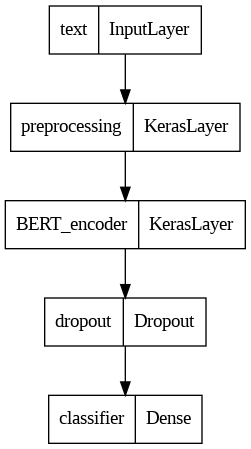

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
#Loss function
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [ ]:
classifier_model.compile(optimizer='Adam',
                         loss=loss,
                         metrics=metrics)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(X_train, y_train, epochs=5)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/5
110/110 [==============================] - 1077s 10s/step - loss: 0.7309 - binary_accuracy: 0.4935
Epoch 2/5
110/110 [==============================] - 1056s 10s/step - loss: 0.7203 - binary_accuracy: 0.5026
Epoch 3/5
110/110 [==============================] - 1047s 10s/step - loss: 0.7153 - binary_accuracy: 0.5165
Epoch 4/5
110/110 [==============================] - 1031s 9s/step - loss: 0.7227 - binary_accuracy: 0.5071
Epoch 5/5
110/110 [==============================] - 1029s 9s/step - loss: 0.7292 - binary_accuracy: 0.5014


In [ ]:
loss, accuracy = classifier_model.evaluate(X_val, y_val)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

28/28 [==============================] - 104s 4s/step - loss: 0.7067 - binary_accuracy: 0.5000
Loss: 0.7066993117332458
Accuracy: 0.5


dict_keys(['loss', 'binary_accuracy'])


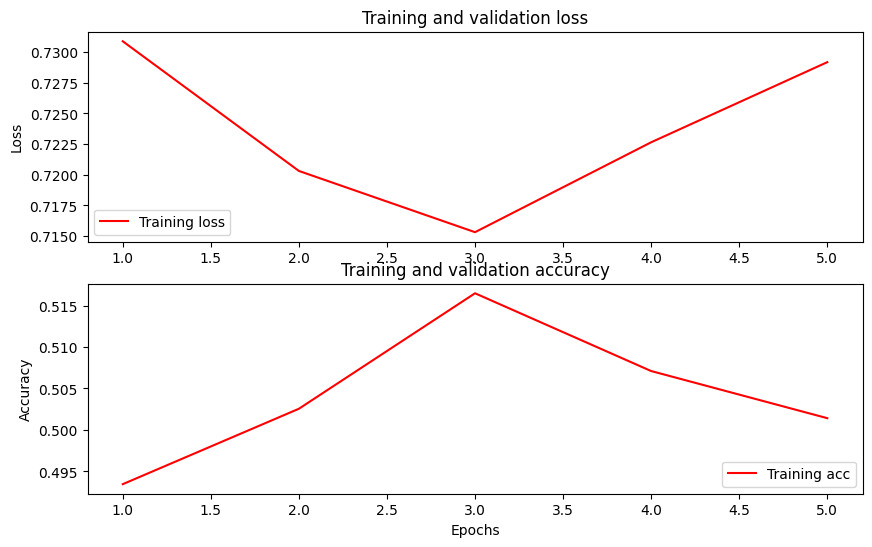

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
loss = history_dict['loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')